In [8]:
import xarray as xr 
import matplotlib.pyplot as plt 
import numpy as np
import xesmf as xe

import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback/')
import functions.data_wrangling as data
import functions.eddy_feedback as ef

In [9]:
# ncep = ncep.interp(latitude=np.arange(-90, 93, 3))
# ncep = data.check_dimensions(ncep, ignore_dim='lon')
# ncep = ncep[['ubar', 'div1_pr']]
# ncep = ncep.rename( {'div1_pr': 'div1'})

### Reanalysis Data

In [10]:
era = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/regridded/era_TEM_3x3_ef.nc')
jra = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/regridded/jra_TEM_3x3_ef.nc')
ncep = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/regridded/ncep-ncar_TEM_3x3_ef.nc')

In [11]:
era_efp = ef.calculate_efp_lat_reanalysis(era)
jra_efp = ef.calculate_efp_lat_reanalysis(jra)
ncep_efp = ef.calculate_efp_lat_reanalysis(ncep)

### PAMIP Data

In [12]:
awi = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/3x3_ef_AWI.nc')
fgoals = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/3x3_ef_FGOALS.nc')
cnrm = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/3x3_ef_CNRM.nc')

In [13]:
awi_efp = ef.calculate_efp_lat_pamip(awi, cut_pole=84)
fgoals_efp = ef.calculate_efp_lat_pamip(fgoals, cut_pole=84)
cnrm_efp = ef.calculate_efp_lat_pamip(cnrm, cut_pole=84)

# Plot Figure 6b

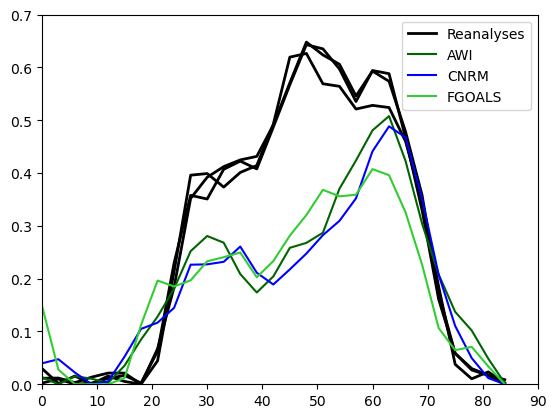

In [26]:
plt.figure()

# plot reanalysis data
plt.plot(era_efp.lat.values, era_efp, color='k', linewidth=2, label='Reanalyses')
plt.plot(jra_efp.lat.values, jra_efp, color='k', linewidth=2)
plt.plot(ncep_efp.lat.values, ncep_efp, color='k', linewidth=2)

#plot PAMIP data
plt.plot(awi_efp.lat.values, awi_efp, color='darkgreen', label='AWI')
plt.plot(cnrm_efp.lat.values, cnrm_efp, color='blue', label='CNRM')
plt.plot(fgoals_efp.lat.values, fgoals_efp, color='limegreen', label='FGOALS')

plt.xlim([0,90])
plt.ylim([0,0.7])
plt.legend()
plt.show()